In [1]:
# This code snippet perform prediction on validation dataset and generates emotion plot based on a 
# 1 sound sample from each quadrant of validation dataset.

import os
import pandas as pd
import Feature_Extraction_Util_V2 as util

# Loading the model
import pickle

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# Play sound
from playsound import playsound

#Utility functions
def play_music(song_path):
    playsound(song_path)
    
def make_predictions(raw_dataset, carnatic_raga_flag = 'N', plots_needed='N',raga_name=""):
    model_file_path = "D:/PhD Program/Final Research/Dissertation/Data/Model Datasets/" # Hardcoded for now
    data_df_test = raw_dataset
    data_df_test = data_df_test.fillna(0)
    cols_to_choose = ['spect_centroid_median', 'loudness_mean', 'spect_rolloff_mean', 'f0_mean', 'mel_57_median', 'mel_60_median',
     'spect_contrast_median', 'f0_max', 'power_median', 'mel_3_mean', 'power_iqr', 'mel_4_sd', 'mel_45_median', 'power_mean', 'f0_median', 'mel_14_min', 'power_max', 'mel_2_max', 'mel_48_median', 'zcr_median', 'mel_1_max',
     'mel_4_median', 'spect_rolloff_median', 'spect_contrast_mean', 'zcr_iqr', 'mel_2_iqr', 'spect_centroid_max',
     'rms_max', 'mel_4_max', 'mel_0_sd', 'mel_0_iqr', 'spect_centroid_min', 'mel_1_median', 'power_sd',
     'spect_contrast_min', 'mel_3_sd', 'mel_0_median', 'mel_60_min', 'spect_rolloff_sd', 'zcr_mean', 'mel_23_median',
     'spect_rolloff_iqr', 'mel_2_sd', 'spect_bw_median', 'mel_6_max', 'spect_rolloff_max', 'spect_contrast_sd',
     'spect_centroid_sd', 'mel_61_median', 'mel_40_iqr', 'mel_3_iqr', 'spect_bw_max', 'mel_0_max', 'spect_bw_min',
     'zcr_sd', 'mel_61_iqr', 'mel_54_median', 'mel_4_mean', 'mel_8_min', 'mel_5_min', 'zcr_max', 'mel_38_iqr', 'mel_56_median', 'mel_5_max', 'spect_centroid_mean', 'mel_45_iqr', 'mel_7_iqr', 'mel_1_iqr', 'mel_13_min',
     'mel_40_median', 'mel_2_median', 'mel_59_median', 'mel_46_median', 'mel_8_median', 'mel_9_iqr', 'spect_bw_mean',
     'spect_bw_sd', 'mel_11_median', 'mel_6_sd', 'plp_mean', 'mel_7_min', 'mel_42_median', 'mel_12_min', 'mel_1_mean',
     'mel_39_median', 'mel_34_min', 'mel_11_mean', 'spect_contrast_iqr', 'mel_7_max', 'mel_53_median']
    
    # load the model
    ab_model_4_class = pickle.load(open(model_file_path+"AB_final_model_4_classes.md5",'rb'))

    emotion_vals = ['Happy','Anger, Disgust, Fear','Sad','Calm']
    # make predictions

    mean_vals =[]
    color_vals = []
    q_vals = []
    #print(file_name)

    if carnatic_raga_flag == 'Y':
        orig_class =''
    else:
        orig_class = ''.join(set(data_df_test.sound_file_class))
    data_df_test = data_df_test[cols_to_choose]
    y_pred_model = ab_model_4_class.predict(data_df_test)
    y_pred_model_prob = ab_model_4_class.predict_proba(data_df_test)

    total_rec = len(y_pred_model)
    q1_count = 0
    q2_count = 0
    q3_count = 0
    q4_count = 0
    agg_vals = []
    for pred_val in y_pred_model:

        if pred_val == 1:
            mean_val = 0.375
            color_val = 'green'
            q_val = 'Q2'
            q2_count += 1
        elif pred_val == 2:
            mean_val = 0.625
            color_val = 'blue'
            q_val = 'Q3'
            q3_count += 1
        elif pred_val == 3:
            mean_val = 0.875
            color_val = 'black'
            q_val = 'Q4'
            q4_count += 1
        else:
            mean_val = 0.125
            color_val = 'gray'
            q_val = 'Q1'
            q1_count += 1

        mean_vals.append(mean_val)
        color_vals.append(color_val)
        q_vals.append(q_val)

    agg_vals.append(round((q1_count/total_rec)*100,2))
    agg_vals.append(round((q2_count/total_rec)*100,2))
    agg_vals.append(round((q3_count/total_rec)*100,2))
    agg_vals.append(round((q4_count/total_rec)*100,2))

#     emotion_df = pd.DataFrame({'mer_val':mean_vals,
#                                'quad_val':q_vals,
#                               'color_code':color_vals})  
    
    emotion_df_grp = pd.DataFrame({"Emotion":emotion_vals,
                                  "perc":agg_vals,
                                  "Quadrant":['Q1','Q2','Q3','Q4']})
    
    if plots_needed == 'Y':
        # plot predictions
        x = [i for i in range(0,len(mean_vals))]
        plt.plot(x,mean_vals, color = 'gray', linewidth=0.25)
        plt.scatter(x,mean_vals, c=color_vals)
        plt.axhline(y=0, c='gray', linestyle='--',  linewidth=0.5, label='Q1')
        plt.axhline(y=0.25, c='green', linestyle='--',  linewidth=0.5, label='Q2')
        plt.axhline(y=0.5, c='blue', linestyle='--',  linewidth=0.5, label='Q3')
        plt.axhline(y=0.75, c='black', linestyle='--',  linewidth=0.5, label='Q4')

        if carnatic_raga_flag=='Y':
            plt.title("Emotion plot -"+raga_name)
        else:
            plt.title(file_name+": original emotion quadrant - "+orig_class)
        ax=plt.gca()
        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
        plt.ylim(0,1)
        plt.show()



    #     emotion_df_grp = pd.DataFrame(emotion_df.groupby(['color_code'])['mer_val'].count()).reset_index()
    #     emotion_df_grp['perc'] = round((emotion_df_grp['mer_val']/sum(emotion_df_grp['mer_val']))*100,2)
    #     emotion_df_grp['Emotion Quadrant'] = emotion_df_grp.apply(lambda x: 'Q4' if x.color_code == 'black' 
    #                                                               else ('Q2' if x.color_code == 'green' 
    #                                                                     else ('Q3' if x.color_code == 'blue' else 'Q1')), axis=1)

    #     emotion_df_grp['Emotion'] = emotion_df_grp.apply(lambda x: 'Calm' if x.color_code == 'black' 
    #                                                           else ('Anger, Disgust, Fear' if x.color_code == 'green' 
    #                                                                 else ('Sad' if x.color_code == 'blue' else 'Happy')), axis=1)

    #     emotion_df_grp.sort_values(by=['Emotion Quadrant'], inplace=True)
        
        sns_plot = sns.barplot(x="Emotion", y="perc", data=emotion_df_grp, dodge=False)
        for bar in sns_plot.patches:
            sns_plot.annotate(str(bar.get_height())+"%",
                           (bar.get_x() + bar.get_width() / 2,
                            bar.get_height()), ha='center', va='center',
                           size=10, xytext=(0, 8),
                           textcoords='offset points')
            bar.set_color('blue')


        if carnatic_raga_flag == 'Y':
            plt.title("Emotion plot - "+raga_name)
        else:
            plt.title(file_name+": original emotion quadrant - "+orig_class)
        plt.ylim(0,110)
        plt.show()
    return emotion_df_grp
    
def getMER(file_name, raga_name, hilbert_transform_val='N', plots_needed = 'N'):
    # This routine extracts musical features and make the perdiction on emotion classification
    # The classification results is returned as a dataframe and the emotion plots - trend and bar
    # are returned as objects. Hence this function returns 3 elements
    
    # Error handling is not implement yet in this routine
    # Input paramters are:
    # 1. file_name - full path of the song (mp3 file) 
    # 2. raga_name - name of the raga to which the song belongs to
    
    # Default values/parameters
    num_mfcc = 20
    num_mel = 64
    mel_cutoff_val = 0.01
    hilbert_transform_val = "N"
    MFCC_flag = "Y" 

    file_path = file_name
    print("Extracting features for ..... :" + file_path)
    
    db_row = {'sound_file_name': [file_name],
             'raga':[raga_name]}
    
    feat_util = util.Feature_Util() # Ensure that Feature_Extraction_Util_V2 package is imported
    # read sound file
    ret_val, msg_val, full_signal_val, sr = feat_util.readSignal(file_path,hilbert_transform=hilbert_transform_val)

    sound_file_size = len(full_signal_val)/sr
    # 5 second window
    window_size_duration = 5*sr 

    # start after 3 seconds
    start_pos = 3*sr 
    slider_width = window_size_duration
    overlap_sample_size = sr
    end_pos = start_pos +  slider_width - overlap_sample_size
    exit_flag = False
    sample_cntr = 1
    
    while not exit_flag:
        end_pos = start_pos +  slider_width - overlap_sample_size
        if end_pos > len(full_signal_val):
            end_pos = len(full_signal_val)
            exit_flag = True    
        # Extract a sample from the whole signal 
        signal_val = full_signal_val[start_pos:end_pos]
        #print(" Start: " + str(start_pos)+" , End: "+str(end_pos))
        start_pos = end_pos
        # get features and aggregations
        # F0
        ret_val, msg_str, feature_val =  feat_util.getFZero(signal_val)
        agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="F0",mean_agg = "Y", median_agg = "Y", max_agg = "Y", min_agg = "Y", IQR_agg = "N", sd_agg ="N")
        db_row = db_row | agg_val

        # RMS
        ret_val,msg_str, feature_val =  feat_util.getRMS(signal_val)
        agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="RMS",mean_agg = "Y", median_agg = "Y", max_agg = "Y", min_agg = "N", IQR_agg = "N", sd_agg ="N")
        db_row = db_row | agg_val

        # Spectral Centroid
        ret_val,msg_str, feature_val =  feat_util.getSpectralCentroid(signal_val)
        agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="spect_centroid")
        db_row = db_row | agg_val

        # Spectral Roll Off
        ret_val,msg_str, feature_val =  feat_util.getSpectralRolloff(signal_val)
        agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="spect_rolloff")
        db_row = db_row | agg_val

        # Spectral Flatness
        ret_val,msg_str, feature_val =  feat_util.getSpectralFlatness(signal_val)
        agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="spect_flat")
        db_row = db_row | agg_val

        # Spectral BW
        ret_val,msg_str, feature_val =  feat_util.getSpectralBW(signal_val)
        agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="spect_bw")
        db_row = db_row | agg_val

        # Spectral Contrast
        ret_val,msg_str, feature_val =  feat_util.getSpectralContrast(signal_val)
        agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="spect_contrast")
        db_row = db_row | agg_val

        # ZCR
        ret_val,msg_str, feature_val =  feat_util.getZCR(signal_val)
        agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="ZCR")
        db_row = db_row | agg_val

        # Beat / Tempo
        ret_val,msg_str, feature_val =  feat_util.getTempo(signal_val, sr)
        agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="tempo")
        db_row = db_row | agg_val

        # PLP
        ret_val,msg_str, feature_val =  feat_util.getPLP(signal_val, sr)
        agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="plp")
        db_row = db_row | agg_val

        # Power
        ret_val,msg_str, feature_val =  feat_util.getPower(signal_val, sr=sr)
        agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="power")
        db_row = db_row | agg_val

        # get MFCC's
        if MFCC_flag == "Y":
            for mfcc_count in range(num_mfcc):
                mfcc_str = "MFCC_" + str(mfcc_count)
                ret_val, msg_str, feature_val = feat_util.getMFCC(signal_val, sr=sr, pos_val=mfcc_count)
                agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name=mfcc_str)
                db_row = db_row | agg_val

        # get MEL
        for mel_count in range(num_mel):
            mel_str = "mel_" + str(mel_count)
            ret_val, msg_str, feature_val = feat_util.getMel(signal_val, sr=sr, pos_val=mel_count, cutoff_val=mel_cutoff_val)
            agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name=mel_str)
            db_row = db_row | agg_val

        # get Loudness
        ret_val,msg_str, feature_val =  feat_util.getLoudness(file_path)
        #agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="loudness")
        db_row = db_row | {'loudness_mean':[feature_val]}

        # get Chromagram - To be included later. Hence commenting.
        # ret_val,msg_str, feature_val = feat_util.getChromagram(signal_val, sr=sr)
        # agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="chromagram")
        # db_row = db_row | agg_val

        temp_df = pd.DataFrame(db_row)
        # Build feature dataset
        if sample_cntr == 1:
            sample_df = temp_df
            #break
        else:
            sample_df = pd.concat([sample_df,temp_df],axis=0)
        sample_cntr += 1
    print("Making predictions.....:")
    #print(sample_df.shape)
    pred_df = make_predictions(sample_df,carnatic_raga_flag='Y',plots_needed=plots_needed,raga_name=raga_name)
    return pred_df

Getting songs of raga : Mayamalavagaula
Extracting features for ..... :D:/PhD Program/Final Research/Carnatic Songs/Vocals_sample/Mayamalavagaula/01-sarasijanAbhamurArE-mAyAmALavagauLa.mp3


D:\MyApps\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
D:\MyApps\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=384 is too small for input signal of length=345
  warnings.warn(
D:\MyApps\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=384 is too small for input signal of length=216
  warnings.warn(


Making predictions.....:


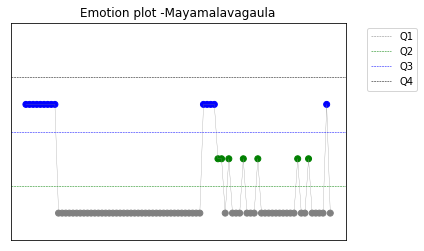

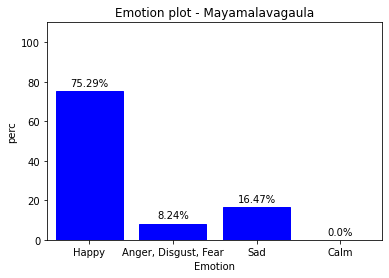

(4, 3)
Getting songs of raga : Bhairavi
Extracting features for ..... :D:/PhD Program/Final Research/Carnatic Songs/Vocals_sample/Bhairavi/01-viribONi_ninnE-VARNAM-bhairavi.mp3


D:\MyApps\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
D:\MyApps\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=384 is too small for input signal of length=345
  warnings.warn(
D:\MyApps\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\MyApps\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\MyApps\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=180
  warnings.warn(
D:\MyApps\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=384 is too small for input signal of length=1
  warnings.warn(


Making predictions.....:


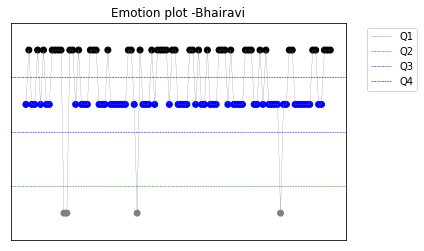

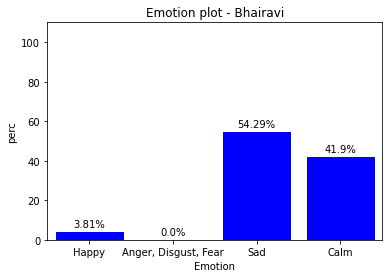

(4, 3)


In [3]:
songs_dir_root = "D:/PhD Program/Final Research/Carnatic Songs/Vocals/"
#raga_names = ['Mayamalavagaula','Bhairavi','Kalyani','Kedaragaula','Khamboji','Mohanam','Shankarabharanam','Todi']
songs_dir_root = "D:/PhD Program/Final Research/Carnatic Songs/Vocals_sample/"
raga_names = ['Mayamalavagaula','Bhairavi']
# song_path = songs_dir_root+''.join(raga_names[0])+"/01-dasharatha_nandana_disha-mAyAmALavagauLa.mp3"
# pred_df = getMER(song_path,'Mayamalavagowla')
song_cntr = 1
for raga_name in raga_names:
    print("Getting songs of raga :", raga_name)
    songs_dir = songs_dir_root +raga_name+"/"
    for root, dirs, files in os.walk(songs_dir):
        for file_name in files:
            song_path = songs_dir+file_name
            try:
                pred_df = getMER(song_path,raga_name, plots_needed='Y')
                #print(pred_df.shape)
            except Exception as e:
                print("Error processing song at the path:" +str(song_path)+" belonging to raga "+raga_name)
                print(str(e))
                continue
            
            raga_name_list = [ raga_name for j in range(0,pred_df.shape[1]+1)]
            pred_df['raga'] = raga_name_list            
            #print(pred_df)
            if song_cntr==1:
                final_df = pred_df
            else:
                final_df = pd.concat([final_df,pred_df],axis=0)
            song_cntr +=1


In [7]:
#final_df.to_csv("carnatic_raga_MER_dataset.csv", index=False)

In [ ]:
# # Extract Features from data set - DS 1: MER Audio Traffic dataset: split 1 mp3 file into multiple observations
# # one observation = 5 second duration

# songs_dir_root = "D:/PhD Program/Phd - Data Science/Research Project/Carnatic Songs/Vocals/"
# raga_names = ['Mayamalavagaula','Bhairavi']
# #raga_names = ['Mayamalavagaula','Bhairavi','Kalyani','Kedaragaula','Khamboji','Mohanam','Shankarabharanam','Todi']
# # songs_path = songs_dir_root + ''.join(raga_names[0])
# import os
# os.chdir(songs_dir_root)

# import pandas as pd
# import Feature_Extraction_Util_V2 as util
# import os

# num_mfcc = 20
# num_mel = 64
# mel_cutoff_val = 0.01
# hilbert_transform_val = "N"
# MFCC_flag = "Y" 
# feature_file_name = "Carnatic_ragas"

# feature_file_name = root_path+feature_file_name + ".csv"
# print(feature_file_name)

# feat_util = util.Feature_Util()
# file_cntr = 1
# for raga_name in raga_names:
#     songs_path = songs_dir_root + raga_name
#     print(raga_name)
#     for root, dirs, files in os.walk(songs_path):
#         raga_file_cntr = 0
#         for file_name in files:
#             #print(file_name)
#             #print("Temp counter: " + str(temp_cntr))
#             file_path = songs_path +"/" +file_name
#             db_row = {'sound_file_name': [file_name],
#                      'raga':[raga_name]}
#             # read sound file
#             ret_val, msg_val, full_signal_val, sr = feat_util.readSignal(file_path,hilbert_transform=hilbert_transform_val)

#             sound_file_size = len(full_signal_val)/sr
#             # 5 second window
#             window_size_duration = 5*sr 

#             # start after 3 seconds
#             start_pos = 3*sr 
#             slider_width = window_size_duration
#             overlap_sample_size = sr
#             end_pos = start_pos +  slider_width - overlap_sample_size
#             exit_flag = False
#             sample_cntr = 1
#     #             print(len(full_signal_val))
#     #             print(sr)
#             while not exit_flag:
#                 end_pos = start_pos +  slider_width - overlap_sample_size
#                 if end_pos > len(full_signal_val):
#                     end_pos = len(full_signal_val)
#                     exit_flag = True    
#                 # Extract a sample from the whole signal 
#                 signal_val = full_signal_val[start_pos:end_pos]
#                 #print(" Start: " + str(start_pos)+" , End: "+str(end_pos))
#                 start_pos = end_pos
#                 # get features and aggregations
#                 # F0
#                 ret_val, msg_str, feature_val =  feat_util.getFZero(signal_val)
#                 agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="F0",mean_agg = "Y", median_agg = "Y", max_agg = "Y", min_agg = "Y", IQR_agg = "N", sd_agg ="N")
#                 db_row = db_row | agg_val

#                 # RMS
#                 ret_val,msg_str, feature_val =  feat_util.getRMS(signal_val)
#                 agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="RMS",mean_agg = "Y", median_agg = "Y", max_agg = "Y", min_agg = "N", IQR_agg = "N", sd_agg ="N")
#                 db_row = db_row | agg_val

#                 # Spectral Centroid
#                 ret_val,msg_str, feature_val =  feat_util.getSpectralCentroid(signal_val)
#                 agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="spect_centroid")
#                 db_row = db_row | agg_val

#                 # Spectral Roll Off
#                 ret_val,msg_str, feature_val =  feat_util.getSpectralRolloff(signal_val)
#                 agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="spect_rolloff")
#                 db_row = db_row | agg_val

#                 # Spectral Flatness
#                 ret_val,msg_str, feature_val =  feat_util.getSpectralFlatness(signal_val)
#                 agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="spect_flat")
#                 db_row = db_row | agg_val

#                 # Spectral BW
#                 ret_val,msg_str, feature_val =  feat_util.getSpectralBW(signal_val)
#                 agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="spect_bw")
#                 db_row = db_row | agg_val

#                 # Spectral Contrast
#                 ret_val,msg_str, feature_val =  feat_util.getSpectralContrast(signal_val)
#                 agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="spect_contrast")
#                 db_row = db_row | agg_val

#                 # ZCR
#                 ret_val,msg_str, feature_val =  feat_util.getZCR(signal_val)
#                 agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="ZCR")
#                 db_row = db_row | agg_val

#                 # Beat / Tempo
#                 ret_val,msg_str, feature_val =  feat_util.getTempo(signal_val, sr)
#                 agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="tempo")
#                 db_row = db_row | agg_val

#                 # PLP
#                 ret_val,msg_str, feature_val =  feat_util.getPLP(signal_val, sr)
#                 agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="plp")
#                 db_row = db_row | agg_val

#                 # Power
#                 ret_val,msg_str, feature_val =  feat_util.getPower(signal_val, sr=sr)
#                 agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="power")
#                 db_row = db_row | agg_val

#                 # get MFCC's
#                 if MFCC_flag == "Y":
#                     for mfcc_count in range(num_mfcc):
#                         mfcc_str = "MFCC_" + str(mfcc_count)
#                         ret_val, msg_str, feature_val = feat_util.getMFCC(signal_val, sr=sr, pos_val=mfcc_count)
#                         agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name=mfcc_str)
#                         db_row = db_row | agg_val

#                 # get MEL
#                 for mel_count in range(num_mel):
#                     mel_str = "mel_" + str(mel_count)
#                     ret_val, msg_str, feature_val = feat_util.getMel(signal_val, sr=sr, pos_val=mel_count, cutoff_val=mel_cutoff_val)
#                     agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name=mel_str)
#                     db_row = db_row | agg_val

#                 # get Loudness
#                 ret_val,msg_str, feature_val =  feat_util.getLoudness(file_path)
#                 #agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="loudness")
#                 db_row = db_row | {'loudness_mean':[feature_val]}

#                 # get Chromagram - To be included later. Hence commenting.
#                 # ret_val,msg_str, feature_val = feat_util.getChromagram(signal_val, sr=sr)
#                 # agg_val, msg_str = feat_util.calcAggregations(feature_val, feature_name="chromagram")
#                 # db_row = db_row | agg_val

#                 temp_df = pd.DataFrame(db_row)
#                 # Build feature dataset
#                 if sample_cntr == 1:
#                     sample_df = temp_df
#                     #break
#                 else:
#                     sample_df = pd.concat([sample_df,temp_df],axis=0)
#                 sample_cntr += 1

#             data_df = sample_df

#             # Build feature dataset
#             if file_cntr == 1:
#                 final_df = data_df
#                 #break
#             else:
#                 final_df = pd.concat([final_df,data_df],axis=0)
#             file_cntr += 1
#             if raga_file_cntr >=4:
#                 break
#             raga_file_cntr +=1
#             print("Extracted feature from file: "+str(file_path))

# # Save feature dataset
# final_df = final_df.reset_index()
# final_df = final_df.drop(columns = ['index'])
# final_df.to_csv(feature_file_name, index=False)

In [ ]:
# # This code snippet perform prediction on 5 songs in raga mayamalavagowla & bhairavi and generates emotion plot based 
# root_path = "D:/PhD Program/Final Research/Dissertation/Data/Model Datasets/"
# song_file_name = "Carnatic_ragas.csv"

# song_df = pd.read_csv(root_path+song_file_name)
# song_df = song_df.fillna(0)
# files_to_choose = list(set(song_df.sound_file_name))

# for file_name in files_to_choose:
#     print(file_name)
#     data_df_test = song_df[song_df.sound_file_name == file_name]  

#     # Make predictions
#     pred_df = make_predictions(data_df_test,carnatic_raga_flag='Y')
#     print(pred_df)

In [ ]:
# # Set file paths and make predictions on validation dataset
# root_path = "D:/PhD Program/Final Research/Dissertation/Data/Model Datasets/"
# data_file_path = root_path + "DS_1_All_Feature_5_sec_nMFCC_nht_ns_yat.csv"
# os.chdir(root_path)
# data_df_raw = pd.read_csv(data_file_path)

# files_to_choose = ['MT0001335920.mp3','MT0001613887.mp3','MT0000088320.mp3','MT0000092267.mp3']
# for file_name in files_to_choose:
#     data_df_test = data_df_raw[data_df_raw.sound_file_name == file_name]  

#     # Make predictions
#     emotion_df_grp, plt_obj_1, plt_obj_2 = make_predictions(data_df_test)